In [88]:
''' why numpy: numpy is an open source python library that can efficiently do numerical operations on large quantities of data.
There are a few functions that exist in numpy that we use on pandas dataframe most importantly pandas is build on top on numpy 
i.e, why for data analysis we import both both numpy and pandas
where pandas help in creating structured data called as dataFrame and can perform data wrangling'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [89]:
df=pd.read_csv("studentsnew.csv")
df

,Rank,Name,Age,Gender,Background,Python,Machine Learning
0,Rank 1,Ravi,23,Male,Tech,89,95
1,Rank 2,Chandni,22,Female,Non-Tech,78,83
2,Rank 3,Gyanesh,25,Male,Tech,70,80
3,Rank 4,Rahul,22,Male,Tech,68,75
4,Rank 5,Kartik,23,Male,Tech,60,70
5,Rank 6,Pratiksha,24,Female,Non-Tech,58,55
6,Rank 7,Maya,22,Female,Non-Tech,55,50
7,Rank 8,Shani,21,Male,Tech,50,50
8,Rank 9,Neelam,24,Female,Non-Tech,50,47
9,Rank 10,Mangal,22,Male,Non-Tech,45,46


In [90]:
df.info()  # to have a quick glimps of data
# numerical data-----3 cols--- Age, Python, Machine Lerning
# categorical data---4 cols---Rant, Name, Gender, Background
# Null values-------0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              10 non-null     object
 1   Name              10 non-null     object
 2   Age               10 non-null     int64 
 3   Gender            10 non-null     object
 4   Background        10 non-null     object
 5   Python            10 non-null     int64 
 6   Machine Learning  10 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


In [91]:
df.describe()  # stastistical disribution of numerical data. This helps in undrstanding data distribution more
# Age----mean 22.8 --- median  22.5--------almost normal distribution
# python-mean 62.3 --- median  59--------mean>median---- +ve skewness --- challenge
# ML-----mean 65.1 --- median  62.5--------mean>median---- +ve skewness --- challenge

,Age,Python,Machine Learning
count,10.000000,10.000000,10.000000
mean,22.800000,62.300000,65.100000
std,1.229273,13.864824,17.666352
min,21.000000,45.000000,46.000000
25%,22.000000,51.250000,50.000000
50%,22.500000,59.000000,62.500000
75%,23.750000,69.500000,78.750000
max,25.000000,89.000000,95.000000


### Feature engineering
It is the process that takes raw data and convert it into relevent information to be used by machine learning model

In [92]:
df["Total"]=df["Python"]+df["Machine Learning"]  #feature engineering--- to create a new data based on old data, here we have added 'Total' column
df.head()

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total
0,Rank 1,Ravi,23,Male,Tech,89,95,184
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150
3,Rank 4,Rahul,22,Male,Tech,68,75,143
4,Rank 5,Kartik,23,Male,Tech,60,70,130


In [93]:
c=["Mumbai","Mumbai","Mumbai","Pune","Dehli","Dehli","Dehli","Dehli","Pune","Banglore"]
df["City"]=c
df.head()

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai
3,Rank 4,Rahul,22,Male,Tech,68,75,143,Pune
4,Rank 5,Kartik,23,Male,Tech,60,70,130,Dehli


In [94]:
''' the lambda function are anonymous functions they have a single line syntax which makes them more readable 
    and there is no need to search for the argument on another line '''
def f(x):
    return x/2
df["Total 2"]=df["Total"].apply(f)
df["Total 1"]=df["Total"].apply(lambda x:x/2)
df.head()

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Total 2,Total 1
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai,92.0,92.0
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai,80.5,80.5
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai,75.0,75.0
3,Rank 4,Rahul,22,Male,Tech,68,75,143,Pune,71.5,71.5
4,Rank 5,Kartik,23,Male,Tech,60,70,130,Dehli,65.0,65.0


In [95]:
def grade(x):
    if x>=75 and x<100:
        return "A"
    elif x>=60 and x<75:
        return "B"
    elif x>=35 and x<60:
        return "C"
    else:
        return "F"
df["Grade"]=df["Total 1"].apply(grade)
df.head()

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Total 2,Total 1,Grade
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai,92.0,92.0,A
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai,80.5,80.5,A
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai,75.0,75.0,A
3,Rank 4,Rahul,22,Male,Tech,68,75,143,Pune,71.5,71.5,B
4,Rank 5,Kartik,23,Male,Tech,60,70,130,Dehli,65.0,65.0,B


### loc / iloc ------------indexing and slicing of Series and DataFrame

In [96]:
s=pd.Series(['a','b','c','d','e'], index=[43,44,45,0,1])
s

43    a
44    b
45    c
0     d
1     e
dtype: object

In [97]:
s.iloc[0]  #---- iloc returns by default index that starts with 0

'a'

In [98]:
s.loc[0]  #---- loc returns by defined index

'd'

In [99]:
print(s.iloc[0:3])  # for slicing iloc takes stopping criteria-1
print(s.loc[0:1])  # for slicing loc goes till mentioned stopping criteria

43    a
44    b
45    c
dtype: object
0    d
1    e
dtype: object


In [100]:
df

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Total 2,Total 1,Grade
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai,92.0,92.0,A
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai,80.5,80.5,A
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai,75.0,75.0,A
3,Rank 4,Rahul,22,Male,Tech,68,75,143,Pune,71.5,71.5,B
4,Rank 5,Kartik,23,Male,Tech,60,70,130,Dehli,65.0,65.0,B
5,Rank 6,Pratiksha,24,Female,Non-Tech,58,55,113,Dehli,56.5,56.5,C
6,Rank 7,Maya,22,Female,Non-Tech,55,50,105,Dehli,52.5,52.5,C
7,Rank 8,Shani,21,Male,Tech,50,50,100,Dehli,50.0,50.0,C
8,Rank 9,Neelam,24,Female,Non-Tech,50,47,97,Pune,48.5,48.5,C
9,Rank 10,Mangal,22,Male,Non-Tech,45,46,91,Banglore,45.5,45.5,C


In [101]:
print(df.iloc[1,4])
print('---------------------------------------')
print(df.loc[1,'Background'])

Non-Tech
---------------------------------------
Non-Tech


In [102]:
#accessing multiple rows of a single column
print(df.iloc[1:3,7]) 
print('---------------------------------------')
print(df.loc[1:2,'Total'])

1    161
2    150
Name: Total, dtype: int64
---------------------------------------
1    161
2    150
Name: Total, dtype: int64


In [103]:
#accessing multiple rows and column
print(df.iloc[1:3,7:10])
print('---------------------------------------')
print(df.loc[1:2,['Total','City','Total 2']])

   Total    City  Total 2
1    161  Mumbai     80.5
2    150  Mumbai     75.0
---------------------------------------
   Total    City  Total 2
1    161  Mumbai     80.5
2    150  Mumbai     75.0


In [104]:
print(df['Background'].nunique())  # numbers of unique values in a column
print('---------------------------------------')
print(df['Background'].unique())  # unique values in a column
print('---------------------------------------')
print(df['Background'].value_counts())  # unique values in a column with thier total count

2
---------------------------------------
['Tech' 'Non-Tech']
---------------------------------------
Background
Tech        5
Non-Tech    5
Name: count, dtype: int64


In [105]:
print(df['Gender'].value_counts()) # there are more male students than females

Gender
Male      6
Female    4
Name: count, dtype: int64


In [106]:
df['City'].value_counts()

City
Dehli       4
Mumbai      3
Pune        2
Banglore    1
Name: count, dtype: int64

In [107]:
df[df['City']=='Mumbai']  #feching all the data for Mumbai Student

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Total 2,Total 1,Grade
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai,92.0,92.0,A
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai,80.5,80.5,A
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai,75.0,75.0,A


In [108]:
df[df['City']=='Mumbai']['Total'].mean()  #getting avg(mean) of Total for Mumbai Students by method chaining

165.0

In [109]:
df.groupby('City')['Total'].mean()  #Mumbai students are leading and the worst perormance is shown by the Banglore students

City
Banglore     91.0
Dehli       112.0
Mumbai      165.0
Pune        120.0
Name: Total, dtype: float64

<Axes: xlabel='City'>

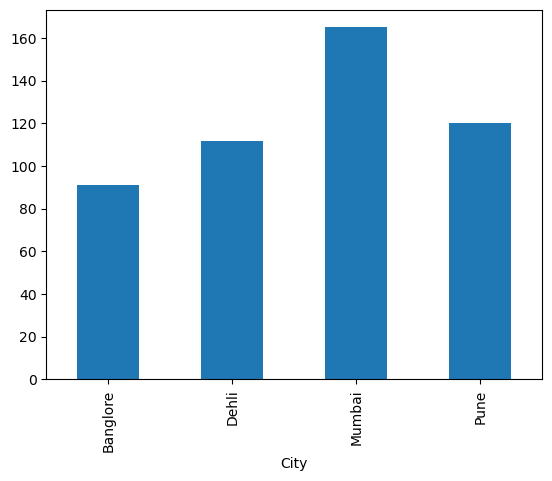

In [110]:
df.groupby('City')['Total'].mean().plot(kind='bar')  #plot()--- by default plot a line chart // using kind attribute you can define the type of chart

<Axes: xlabel='City'>

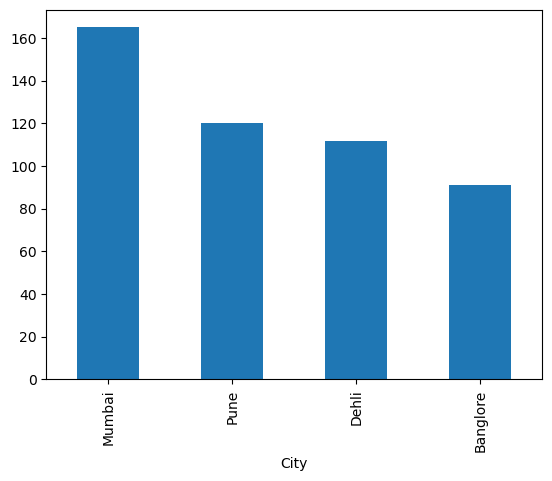

In [111]:
df.groupby('City')['Total'].mean().sort_values(ascending=False).plot(kind='bar')  # sorting the chart from highest to lowest

In [112]:
df.sort_values("Age")

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Total 2,Total 1,Grade
7,Rank 8,Shani,21,Male,Tech,50,50,100,Dehli,50.0,50.0,C
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai,80.5,80.5,A
3,Rank 4,Rahul,22,Male,Tech,68,75,143,Pune,71.5,71.5,B
6,Rank 7,Maya,22,Female,Non-Tech,55,50,105,Dehli,52.5,52.5,C
9,Rank 10,Mangal,22,Male,Non-Tech,45,46,91,Banglore,45.5,45.5,C
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai,92.0,92.0,A
4,Rank 5,Kartik,23,Male,Tech,60,70,130,Dehli,65.0,65.0,B
5,Rank 6,Pratiksha,24,Female,Non-Tech,58,55,113,Dehli,56.5,56.5,C
8,Rank 9,Neelam,24,Female,Non-Tech,50,47,97,Pune,48.5,48.5,C
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai,75.0,75.0,A


In [113]:
df.sort_values(["Total","Age"])  # sort the data based on Total and if there are same values in Total then sort by Age

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Total 2,Total 1,Grade
9,Rank 10,Mangal,22,Male,Non-Tech,45,46,91,Banglore,45.5,45.5,C
8,Rank 9,Neelam,24,Female,Non-Tech,50,47,97,Pune,48.5,48.5,C
7,Rank 8,Shani,21,Male,Tech,50,50,100,Dehli,50.0,50.0,C
6,Rank 7,Maya,22,Female,Non-Tech,55,50,105,Dehli,52.5,52.5,C
5,Rank 6,Pratiksha,24,Female,Non-Tech,58,55,113,Dehli,56.5,56.5,C
4,Rank 5,Kartik,23,Male,Tech,60,70,130,Dehli,65.0,65.0,B
3,Rank 4,Rahul,22,Male,Tech,68,75,143,Pune,71.5,71.5,B
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai,75.0,75.0,A
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai,80.5,80.5,A
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai,92.0,92.0,A


In [114]:
df.drop('Total 2',axis=1)  # drop()-- by defaut takes the axis=0 that means row indexing and axis=1 means columns

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Total 1,Grade
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai,92.0,A
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai,80.5,A
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai,75.0,A
3,Rank 4,Rahul,22,Male,Tech,68,75,143,Pune,71.5,B
4,Rank 5,Kartik,23,Male,Tech,60,70,130,Dehli,65.0,B
5,Rank 6,Pratiksha,24,Female,Non-Tech,58,55,113,Dehli,56.5,C
6,Rank 7,Maya,22,Female,Non-Tech,55,50,105,Dehli,52.5,C
7,Rank 8,Shani,21,Male,Tech,50,50,100,Dehli,50.0,C
8,Rank 9,Neelam,24,Female,Non-Tech,50,47,97,Pune,48.5,C
9,Rank 10,Mangal,22,Male,Non-Tech,45,46,91,Banglore,45.5,C


In [115]:
df.drop(['Age','Gender','Background'],axis=1)  # temporary droping multiple columns

,Rank,Name,Python,Machine Learning,Total,City,Total 2,Total 1,Grade
0,Rank 1,Ravi,89,95,184,Mumbai,92.0,92.0,A
1,Rank 2,Chandni,78,83,161,Mumbai,80.5,80.5,A
2,Rank 3,Gyanesh,70,80,150,Mumbai,75.0,75.0,A
3,Rank 4,Rahul,68,75,143,Pune,71.5,71.5,B
4,Rank 5,Kartik,60,70,130,Dehli,65.0,65.0,B
5,Rank 6,Pratiksha,58,55,113,Dehli,56.5,56.5,C
6,Rank 7,Maya,55,50,105,Dehli,52.5,52.5,C
7,Rank 8,Shani,50,50,100,Dehli,50.0,50.0,C
8,Rank 9,Neelam,50,47,97,Pune,48.5,48.5,C
9,Rank 10,Mangal,45,46,91,Banglore,45.5,45.5,C


In [117]:
df.head(3)  #none column is actually deleted

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Total 2,Total 1,Grade
0,Rank 1,Ravi,23,Male,Tech,89,95,184,Mumbai,92.0,92.0,A
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161,Mumbai,80.5,80.5,A
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150,Mumbai,75.0,75.0,A


In [118]:
df.drop(['Age','Gender','Background'],axis=1,inplace=True)  # inplace = True, delete that row or colmn from dataframe

In [119]:
df=df.drop('Total 2',axis=1)  #instead of inplace you can also update the data in existing DataFrame by assinging the droped tables

In [120]:
df  # above mentioned columns are deleted

,Rank,Name,Python,Machine Learning,Total,City,Total 1,Grade
0,Rank 1,Ravi,89,95,184,Mumbai,92.0,A
1,Rank 2,Chandni,78,83,161,Mumbai,80.5,A
2,Rank 3,Gyanesh,70,80,150,Mumbai,75.0,A
3,Rank 4,Rahul,68,75,143,Pune,71.5,B
4,Rank 5,Kartik,60,70,130,Dehli,65.0,B
5,Rank 6,Pratiksha,58,55,113,Dehli,56.5,C
6,Rank 7,Maya,55,50,105,Dehli,52.5,C
7,Rank 8,Shani,50,50,100,Dehli,50.0,C
8,Rank 9,Neelam,50,47,97,Pune,48.5,C
9,Rank 10,Mangal,45,46,91,Banglore,45.5,C


In [121]:
df.drop([1,3,7], inplace=True)  # no need to mention axis=0 as it's by default value is 0

In [122]:
df   # deleted the rows with index 1,3,7

,Rank,Name,Python,Machine Learning,Total,City,Total 1,Grade
0,Rank 1,Ravi,89,95,184,Mumbai,92.0,A
2,Rank 3,Gyanesh,70,80,150,Mumbai,75.0,A
4,Rank 5,Kartik,60,70,130,Dehli,65.0,B
5,Rank 6,Pratiksha,58,55,113,Dehli,56.5,C
6,Rank 7,Maya,55,50,105,Dehli,52.5,C
8,Rank 9,Neelam,50,47,97,Pune,48.5,C
9,Rank 10,Mangal,45,46,91,Banglore,45.5,C


In [123]:
#df.reset_index()   # add a new column at the start with previous indexing
df.reset_index(drop=True, inplace=True)   # drop = True won't add the previous index column as the start
df

,Rank,Name,Python,Machine Learning,Total,City,Total 1,Grade
0,Rank 1,Ravi,89,95,184,Mumbai,92.0,A
1,Rank 3,Gyanesh,70,80,150,Mumbai,75.0,A
2,Rank 5,Kartik,60,70,130,Dehli,65.0,B
3,Rank 6,Pratiksha,58,55,113,Dehli,56.5,C
4,Rank 7,Maya,55,50,105,Dehli,52.5,C
5,Rank 9,Neelam,50,47,97,Pune,48.5,C
6,Rank 10,Mangal,45,46,91,Banglore,45.5,C
